<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n250.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,57.505139,34.904729,96.263672,55.126590,0.001902,253.802031,253.800099,0.001932
1,0.0,1.0,29.133067,95.427375,72.752950,68.438407,-0.001285,275.750514,275.751881,-0.001367
2,0.0,2.0,83.549462,42.780076,95.632244,81.290125,0.001733,313.253640,313.252545,0.001095
3,0.0,3.0,39.794469,82.839526,33.159453,85.263321,0.000134,251.056904,251.056789,0.000115
4,0.0,4.0,98.261062,27.833738,39.827788,85.968379,-0.000053,261.890914,261.891328,-0.000414
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.702211,80.071633,60.050656,73.172905,-0.000145,300.997260,300.997357,-0.000097
119996,999.0,116.0,55.062366,92.652324,96.151935,32.011787,0.000803,285.879216,285.879244,-0.000028
119997,999.0,117.0,90.915877,90.071537,80.269711,35.632256,0.000314,306.889697,306.889439,0.000257
119998,999.0,118.0,56.675498,76.500775,54.496803,88.775063,0.000132,286.448271,286.448404,-0.000133


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,57.505139,34.904729,96.263672,55.126590,0.001902,253.802031,253.800099,0.001932
1,0.0,1.0,29.133067,95.427375,72.752950,68.438407,-0.001285,275.750514,275.751881,-0.001367
2,0.0,2.0,83.549462,42.780076,95.632244,81.290125,0.001733,313.253640,313.252545,0.001095
3,0.0,3.0,39.794469,82.839526,33.159453,85.263321,0.000134,251.056904,251.056789,0.000115
4,0.0,4.0,98.261062,27.833738,39.827788,85.968379,-0.000053,261.890914,261.891328,-0.000414
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.702211,80.071633,60.050656,73.172905,-0.000145,300.997260,300.997357,-0.000097
119996,999.0,116.0,55.062366,92.652324,96.151935,32.011787,0.000803,285.879216,285.879244,-0.000028
119997,999.0,117.0,90.915877,90.071537,80.269711,35.632256,0.000314,306.889697,306.889439,0.000257
119998,999.0,118.0,56.675498,76.500775,54.496803,88.775063,0.000132,286.448271,286.448404,-0.000133


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    57.505139  34.904729  96.263672  55.126590  0.001902  253.802031   
      1.0    29.133067  95.427375  72.752950  68.438407 -0.001285  275.750514   
      2.0    83.549462  42.780076  95.632244  81.290125  0.001733  313.253640   
      3.0    39.794469  82.839526  33.159453  85.263321  0.000134  251.056904   
      4.0    98.261062  27.833738  39.827788  85.968379 -0.000053  261.890914   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  77.702211  80.071633  60.050656  73.172905 -0.000145  300.997260   
      116.0  55.062366  92.652324  96.151935  32.011787  0.000803  285.879216   
      117.0  90.915877  90.071537  80.269711  35.632256  0.000314  306.889697   
      118.0  56.675498  76.500775  54.496803  88.775063  0.000132  286.448271   
      119.0  44.232572  40.299008  77.366823  68.333345 -0.000899  240.230849   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    253.800099  0.001932  
      1.0    275.751881 -0.001367  
      2.0    313.252545  0.001095  
      3.0    251.056789  0.000115  
      4.0    261.891328 -0.000414  
...                 ...       ...  
999.0 115.0  300.997357 -0.000097  
      116.0  285.879244 -0.000028  
      117.0  306.889439  0.000257  
      118.0  286.448404 -0.000133  
      119.0  240.230966 -0.000117  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    57.505139  34.904729  96.263672  55.126590  0.001902  253.802031   
      1.0    29.133067  95.427375  72.752950  68.438407 -0.001285  275.750514   
      2.0    83.549462  42.780076  95.632244  81.290125  0.001733  313.253640   
      3.0    39.794469  82.839526  33.159453  85.263321  0.000134  251.056904   
      4.0    98.261062  27.833738  39.827788  85.968379 -0.000053  261.890914   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  77.702211  80.071633  60.050656  73.172905 -0.000145  300.997260   
      116.0  55.062366  92.652324  96.151935  32.011787  0.000803  285.879216   
      117.0  90.915877  90.071537  80.269711  35.632256  0.000314  306.889697   
      118.0  56.675498  76.500775  54.496803  88.775063  0.000132  286.448271   
      119.0  44.232572  40.299008  77.366823  68.333345 -0.000899  240.230849   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    253.800099  0.001932  
      1.0    275.751881 -0.001367  
      2.0    313.252545  0.001095  
      3.0    251.056789  0.000115  
      4.0    261.891328 -0.000414  
...                 ...       ...  
999.0 115.0  300.997357 -0.000097  
      116.0  285.879244 -0.000028  
      117.0  306.889439  0.000257  
      118.0  286.448404 -0.000133  
      119.0  240.230966 -0.000117  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,57.505139,34.904729,96.263672,55.126590,0.001902,253.802031,253.800099,0.001932
1,0.0,1.0,29.133067,95.427375,72.752950,68.438407,-0.001285,275.750514,275.751881,-0.001367
2,0.0,2.0,83.549462,42.780076,95.632244,81.290125,0.001733,313.253640,313.252545,0.001095
3,0.0,3.0,39.794469,82.839526,33.159453,85.263321,0.000134,251.056904,251.056789,0.000115
4,0.0,4.0,98.261062,27.833738,39.827788,85.968379,-0.000053,261.890914,261.891328,-0.000414
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.702211,80.071633,60.050656,73.172905,-0.000145,300.997260,300.997357,-0.000097
119996,999.0,116.0,55.062366,92.652324,96.151935,32.011787,0.000803,285.879216,285.879244,-0.000028
119997,999.0,117.0,90.915877,90.071537,80.269711,35.632256,0.000314,306.889697,306.889439,0.000257
119998,999.0,118.0,56.675498,76.500775,54.496803,88.775063,0.000132,286.448271,286.448404,-0.000133


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    57.505139  34.904729  96.263672  55.126590  0.001902  253.802031   
      1.0    29.133067  95.427375  72.752950  68.438407 -0.001285  275.750514   
      2.0    83.549462  42.780076  95.632244  81.290125  0.001733  313.253640   
      3.0    39.794469  82.839526  33.159453  85.263321  0.000134  251.056904   
      4.0    98.261062  27.833738  39.827788  85.968379 -0.000053  261.890914   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  77.702211  80.071633  60.050656  73.172905 -0.000145  300.997260   
      116.0  55.062366  92.652324  96.151935  32.011787  0.000803  285.879216   
      117.0  90.915877  90.071537  80.269711  35.632256  0.000314  306.889697   
      118.0  56.675498  76.500775  54.496803  88.775063  0.000132  286.448271   
      119.0  44.232572  40.299008  77.366823  68.333345 -0.000899  240.230849   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    253.800099  0.001932  
      1.0    275.751881 -0.001367  
      2.0    313.252545  0.001095  
      3.0    251.056789  0.000115  
      4.0    261.891328 -0.000414  
...                 ...       ...  
999.0 115.0  300.997357 -0.000097  
      116.0  285.879244 -0.000028  
      117.0  306.889439  0.000257  
      118.0  286.448404 -0.000133  
      119.0  240.230966 -0.000117  

[120000 rows x 8 columns]

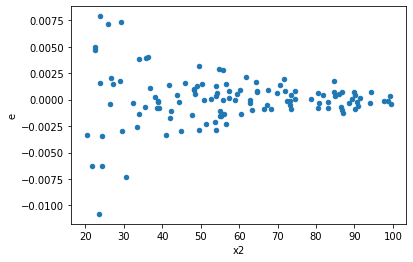

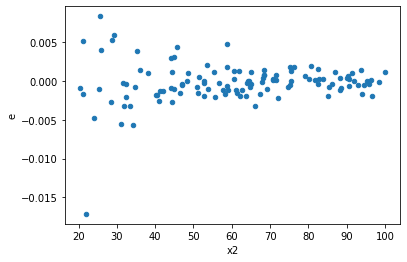

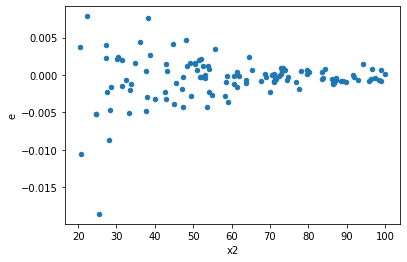

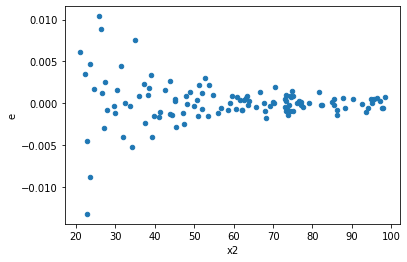

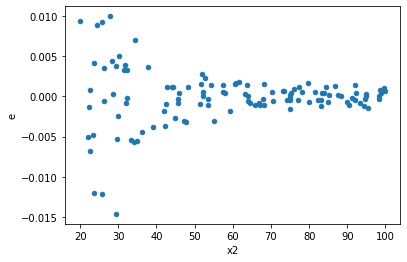

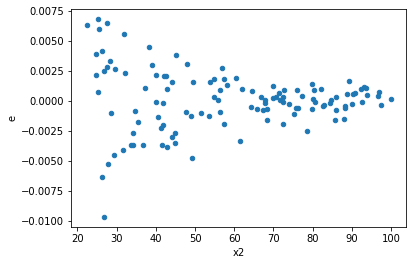

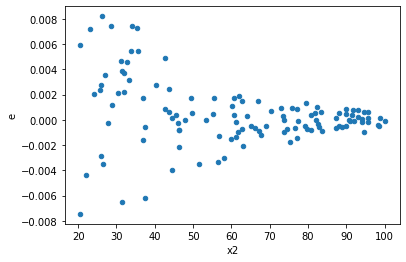

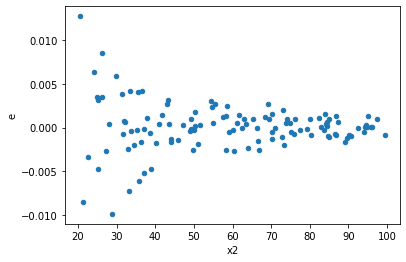

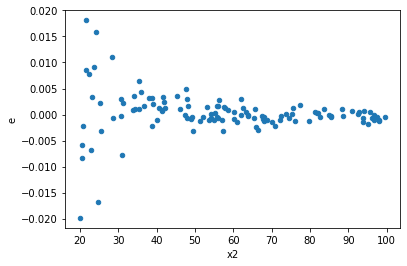

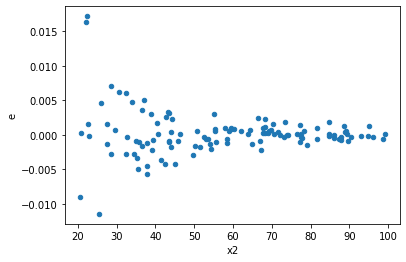

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
57.0,44.0,44.0,0.00022711693732170758,0.00033205876581418766,5.161748575493354e-06,7.546790132140628e-06,1.4620607768403975,0.21168009750983896,0.8941599512450805,0.10584004875491948,Reject005=1 : Homoscedasticity
84.0,44.0,44.0,0.00037166373727218953,0.00042836494050616533,8.446903119822489e-06,9.735566829685576e-06,1.1525604936605651,0.6397480565323563,0.6801259717338218,0.31987402826617817,Reject005=1 : Homoscedasticity
131.0,44.0,44.0,0.00014645346541235514,0.0002345441154214471,3.3284878502807988e-06,5.330548077760162e-06,1.601492424648768,0.1220991937748297,0.9389504031125852,0.06104959688741485,Reject005=1 : Homoscedasticity
142.0,44.0,44.0,0.0003702534347276792,0.00044915708328210446,8.414850789265437e-06,1.0208115529138739e-05,1.213107134610267,0.5243849770060307,0.7378075114969846,0.26219248850301535,Reject005=1 : Homoscedasticity
199.0,44.0,44.0,0.0002066930545624742,0.00021975709379734636,4.697569421874414e-06,4.9944794044851445e-06,1.0632050228418461,0.8398370968178774,0.5800814515910613,0.4199185484089387,Reject005=1 : Homoscedasticity
215.0,44.0,44.0,0.00019502566717094917,0.0003060756287731028,4.432401526612481e-06,6.956264290297791e-06,1.5694120328521328,0.13883205170460355,0.9305839741476982,0.06941602585230178,Reject005=1 : Homoscedasticity
276.0,44.0,44.0,0.0001943515536438354,0.00021267799201659822,4.417080764632622e-06,4.833590727649959e-06,1.0942953016282415,0.7663749322881195,0.6168125338559403,0.38318746614405974,Reject005=1 : Homoscedasticity
342.0,44.0,44.0,0.00020707085865747098,0.00023393454470298426,4.706155878578886e-06,5.3166941977950966e-06,1.1297318522735744,0.6875757784345622,0.6562121107827189,0.3437878892172811,Reject005=1 : Homoscedasticity
358.0,44.0,44.0,0.0003274786586037499,0.00043761326414430414,7.442696786448861e-06,9.945756003279639e-06,1.3363107874269675,0.33986725249069294,0.8300663737546535,0.16993362624534647,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,0.00038997440386145585,0.00010744289410197932,8.863054633214905e-06,2.4418839568631665e-06,0.27551268246864224,3.834281809902247e-05,Reject005=0 : Heteroscedasticity
1.0,44.0,44.0,0.00026405535823310574,0.00017412724590724107,6.001258141661494e-06,3.957437406982751e-06,0.6594346241348493,0.17123562114177127,Reject005=1 : Homoscedasticity
2.0,44.0,44.0,0.0004078948812894504,0.00011858905953374413,9.270338211123872e-06,2.695205898494185e-06,0.29073436557687754,7.647468398295281e-05,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,0.0013086426540320547,8.697496838315623e-05,2.9741878500728515e-05,1.976703826889914e-06,0.06646196967153556,1.7581572749964348e-15,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,0.0004382423793505664,0.00022427762153058394,9.960054076149237e-06,5.097218671149635e-06,0.5117661643379676,0.028586213584709412,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,0.00039034362036073834,8.483286207735617e-05,8.871445917289508e-06,1.9280195926671858e-06,0.21732867569081155,1.448746959734969e-06,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,0.000353954354981631,0.00010636697928259258,8.044417158673432e-06,2.4174313473316496e-06,0.3005104409242617,0.00011574725069253704,Reject005=0 : Heteroscedasticity
7.0,44.0,44.0,0.000721238328733102,0.00024016579461030944,1.639178019847959e-05,5.458313513870669e-06,0.33299089225079725,0.0003981578296712866,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,0.0005599396224764455,0.0003878830563293598,1.2725900510828306e-05,8.81552400748545e-06,0.6927230021941814,0.2272922529007312,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    873
Reject005=1 : Homoscedasticity      127
Name: Result_test, dtype: int64